In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
plt.style.use("fivethirtyeight")


In [2]:
df = pd.read_csv("temps.csv")


"""
printing the number of rows and columns to 
see whether the data is complete or not.

Under this case the data is not complete as the number of rows are 348,
where as the number of days in 2016 where 366 due to leap year
"""
print(df.shape)

(348, 12)


In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
from datetime import datetime
years = df["year"]
months = df["month"]
days = df["day"]

date = [str(int(year)) + "-" + str(int(month)) + "-" + str(int(day)) for year, month, day in zip(years, months, days)]
date = [datetime.strptime(dates, '%Y-%m-%d') for dates in date]

In [5]:
formatted_df = df.drop(["year", "month", "day"], axis = 1)
formatted_df["dates"] = date

formatted_df.columns
formatted_df = formatted_df[['dates','week','temp_2', 'temp_1', 'average', 'actual', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend']]
df = formatted_df
df

,dates,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016-01-01,Fri,45,45,45.6,45,43,50,44,29
1,2016-01-02,Sat,44,45,45.7,44,41,50,44,61
2,2016-01-03,Sun,45,44,45.8,41,43,46,47,56
3,2016-01-04,Mon,44,41,45.9,40,44,48,46,53
4,2016-01-05,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...
343,2016-12-27,Tues,42,42,45.2,47,41,50,47,47
344,2016-12-28,Wed,42,47,45.3,48,41,49,44,58
345,2016-12-29,Thurs,47,48,45.3,48,43,50,45,65
346,2016-12-30,Fri,48,48,45.4,57,44,46,44,42


Text(0.5, 0, 'dates')

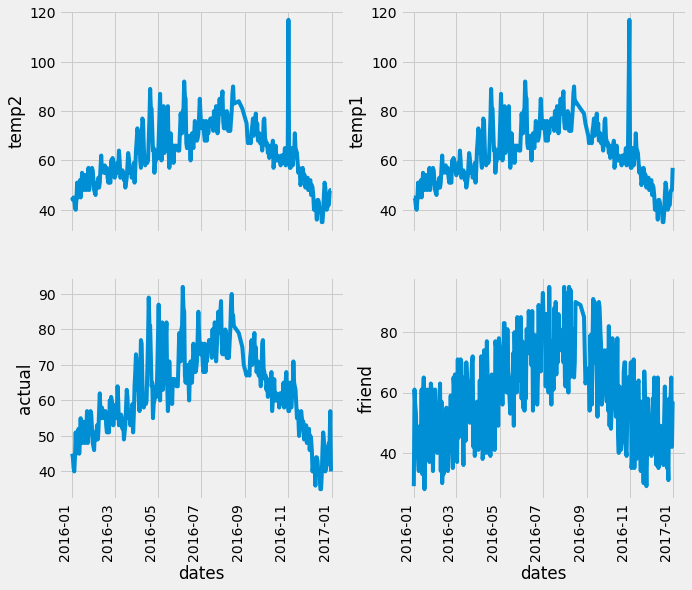

In [6]:
fig, ((ax1, ax2) ,(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.autofmt_xdate(rotation = 90)
ax1.plot(df["dates"],df["temp_2"])
ax2.plot(df["dates"],df["temp_1"])
ax3.plot(df["dates"],df["actual"])
ax4.plot(df["dates"],df["friend"])
      
ax1.set_ylabel("temp2")
ax2.set_ylabel("temp1")
ax3.set_ylabel("actual")
ax4.set_ylabel("friend")

ax3.set_xlabel("dates")
ax4.set_xlabel("dates")      
      
      


In [7]:
#quick summary satistics of the data 
df.describe()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [8]:
#get_dummies quickly converts the string data into one hot encoded data
df = pd.get_dummies(df)
df.head(5)

,dates,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016-01-01,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016-01-02,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016-01-03,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016-01-04,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016-01-05,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [9]:
df = df[['dates','week_Mon','week_Tues', 'week_Wed','week_Thurs','week_Fri','week_Sat', 'week_Sun', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend','actual']]
df

,dates,week_Mon,week_Tues,week_Wed,week_Thurs,week_Fri,week_Sat,week_Sun,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,actual
0,2016-01-01,0,0,0,0,1,0,0,45,45,45.6,43,50,44,29,45
1,2016-01-02,0,0,0,0,0,1,0,44,45,45.7,41,50,44,61,44
2,2016-01-03,0,0,0,0,0,0,1,45,44,45.8,43,46,47,56,41
3,2016-01-04,1,0,0,0,0,0,0,44,41,45.9,44,48,46,53,40
4,2016-01-05,0,1,0,0,0,0,0,41,40,46.0,46,46,46,41,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016-12-27,0,1,0,0,0,0,0,42,42,45.2,41,50,47,47,47
344,2016-12-28,0,0,1,0,0,0,0,42,47,45.3,41,49,44,58,48
345,2016-12-29,0,0,0,1,0,0,0,47,48,45.3,43,50,45,65,48
346,2016-12-30,0,0,0,0,1,0,0,48,48,45.4,44,46,44,42,57


In [10]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]


In [11]:
X

,week_Mon,week_Tues,week_Wed,week_Thurs,week_Fri,week_Sat,week_Sun,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
0,0,0,0,0,1,0,0,45,45,45.6,43,50,44,29
1,0,0,0,0,0,1,0,44,45,45.7,41,50,44,61
2,0,0,0,0,0,0,1,45,44,45.8,43,46,47,56
3,1,0,0,0,0,0,0,44,41,45.9,44,48,46,53
4,0,1,0,0,0,0,0,41,40,46.0,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0,1,0,0,0,0,0,42,42,45.2,41,50,47,47
344,0,0,1,0,0,0,0,42,47,45.3,41,49,44,58
345,0,0,0,1,0,0,0,47,48,45.3,43,50,45,65
346,0,0,0,0,1,0,0,48,48,45.4,44,46,44,42


In [12]:
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [33]:
# The baseline predictions are the historical averages
baseline_preds = X_test["average"]
baseline_preds

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', str(round(np.mean(baseline_errors), 2)) + " degrees") #this here shows on an average how much the avg. temp was off compared to the actual temperature that day

Average baseline error:  5.06 degrees


In [34]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000, random_state = 101)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [35]:
predictions = regressor.predict(X_test)
predictions

array([69.024, 61.368, 50.866, 61.947, 67.526, 70.287, 76.781, 76.635,
       62.014, 74.217, 63.781, 73.28 , 40.43 , 63.048, 71.207, 55.849,
       61.135, 56.677, 56.118, 74.578, 63.976, 54.651, 66.558, 62.725,
       61.18 , 51.985, 65.444, 45.936, 62.613, 78.082, 72.554, 62.669,
       54.703, 80.984, 73.951, 60.868, 53.551, 51.619, 67.966, 42.496,
       68.588, 57.246, 74.014, 42.084, 61.631, 74.558, 53.807, 79.218,
       53.862, 42.522, 46.172, 41.537, 64.76 , 65.813, 73.937, 60.78 ,
       55.432, 60.27 , 54.675, 61.49 , 65.307, 52.254, 61.572, 69.328,
       60.357, 60.61 , 73.439, 69.582, 74.322, 41.37 , 74.728, 58.689,
       59.732, 50.399, 54.245, 65.079, 43.973, 75.187, 46.088, 52.508,
       53.19 , 66.277, 73.333, 73.094, 63.368, 57.714, 45.574, 69.941,
       60.69 , 83.273, 64.473, 49.23 , 51.348, 52.465, 76.232, 40.208,
       41.937, 43.508, 73.971, 74.707, 39.705, 74.376, 70.681, 51.567,
       75.053, 59.294, 41.106, 51.186, 57.457, 63.176, 63.227, 50.35 ,
      

In [36]:
actual_error = print("Avg. prediction error : " + str(round(np.mean(abs(predictions - y_test)),2)) + " degrees")

Avg. prediction error : 3.85 degrees


In [37]:
#Calculating the accuracy of the model 
error = abs(predictions - y_test)
mape = 100 * (error/y_test) #calculating the percentage constituted by errors in actual values 

print("Accuracy percentage: " +  str(round(100 - np.mean(mape), 2)) + " %")

Accuracy percentage: 93.9 %


In [20]:
import pip
pip.main(['install','pydot'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


0

In [23]:
len(df.columns)

16

In [38]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = regressor.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [59]:
#noting down the importance of features in a data set 
importances = list(regressor.feature_importances_)
# importance = [round(100 * x, 2) for x in importance]
importances
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_test.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.6
Variable: average              Importance: 0.18
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.05
Variable: forecast_under       Importance: 0.04
Variable: temp_2               Importance: 0.03
Variable: friend               Importance: 0.03
Variable: week_Mon             Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0


In [60]:
#creating a model with limited data 

df.columns

Index(['dates', 'week_Mon', 'week_Tues', 'week_Wed', 'week_Thurs', 'week_Fri',
       'week_Sat', 'week_Sun', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'actual'],
      dtype='object')

In [69]:
small_df = df[['temp_1', 'average', 'actual']]
small_X = small_df.iloc[:,:-1]
small_y = small_df.iloc[:,-1]

small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(small_X, small_y, test_size=0.35, random_state=42)


In [70]:
small_regressor = RandomForestRegressor(1000,random_state = 42)
small_regressor.fit(small_X_train,small_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [71]:
small_predictions = small_regressor.predict(small_X_test)


In [73]:
small_error = abs(small_predictions - small_y_test)

print("mean error " + str(round(np.mean(small_error),2)) + "degree")

mean error 3.96%


In [76]:
mape = 100 * (small_error/small_y_test)


print("Accuracy percentage " + str( 100 - round(np.mean(mape),2)))

Accuracy percentage 93.72
